# Computer Vision with CNN - Project

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Context:
University X is currently undergoing some research involving understanding the characteristics of
flowers. They already have have invested on curating sample images. They require an automation which can
create a classifier capable of determining a flower’s species from a photo

## Data Description:
The dataset comprises of images from 17 plant species

## Project Objective:
Company’s management requires an automation which can create a classifier capable of
determining a flower’s species from a photo

## Import Libraries

In [12]:
import tensorflow as tf
import os as os
import pandas as pd
import numpy as np
from PIL import Image
import glob
import random
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
#import tflearn.datasets.oxflower17 as oxflower17
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, VGG19, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix


In [ ]:
print(tf.__version__)

2.5.0


## Settings

In [ ]:
# Set the random seet
np.random.seed(1)

In [ ]:
tf.random.set_seed(1)

In [ ]:
# To change the directory
os.chdir('/content/drive/MyDrive/Colab Notebooks/CNN/17flowers')

In [ ]:
# Print the list of directories in working directory
os.listdir()

['.DS_Store', '17flowers.tgz', '17flowers.pkl', 'jpg']

## Load the Images

In [ ]:
# Define the function to load the images from directory and create the respective labels
filepath = "/content/drive/MyDrive/Colab Notebooks/CNN/17flowers/jpg"

def load_image(resize, height=0, width=0):
    images=[] 
    labels=[]
    for i in range(0,17):
        imgfiles = glob.glob(filepath+"/"+str(i)+"/*.jpg", recursive=True)
        for j in range(0, len(imgfiles)):
            img = cv2.imread(imgfiles[j])
            if (resize==True):
              img = cv2.resize(img, (height,width))
            img = np.asarray(img, dtype='float32')
            images.append(img)
            labels.append(i)
    return images, labels


In [ ]:
# Load the images and labels 
imgs, lbls = load_image(resize=False)

In [ ]:
# Print total number of images and labels
print("Total number of images:", len(imgs))
print("Total number of labels", len(lbls))

Total number of images: 1375
Total number of labels 1375


In [ ]:
# Define the function to plot the images
def show_image(imgs, normalized=False, numberofimgs=25):
    plt.figure(figsize=(10,10)) # plot 25 images
    for i in range(numberofimgs):
        n = random.randint(0,len(imgs))
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        if normalized == False:
          plt.imshow(imgs[n]/255, cmap=plt.cm.binary)
        else:
          plt.imshow(imgs[n], cmap=plt.cm.binary)
        plt.xlabel(lbls[n])

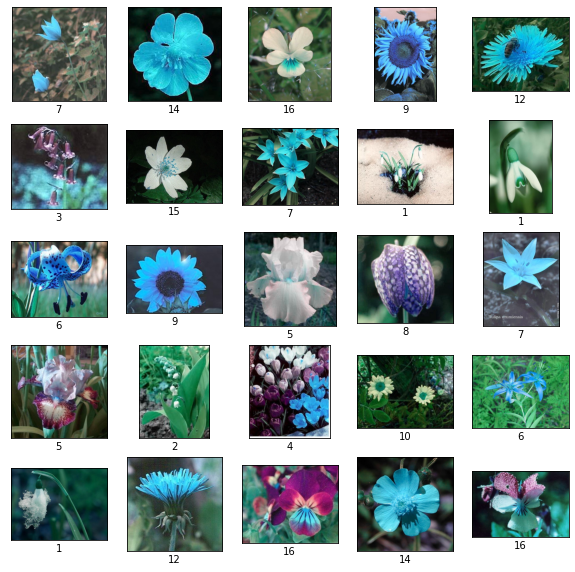

In [ ]:
# Plot the images with labels randomly
show_image(imgs, normalized=False)

In [ ]:
imgs[0].shape

(500, 500, 3)

In [ ]:
imgs[100].shape

(500, 672, 3)

**Observation:**
- The total number of images and labels is 1375. 
- These images are having RGB channels. 
- The images are different sizes. 

## Preprocessing

### Reshape

In [ ]:
# Resize the images using pre defined function
imgs, lbls = load_image(resize=True,  height=224, width=224)
imgs = np.asarray(imgs)
lbls = np.asarray(lbls).reshape(len(lbls))

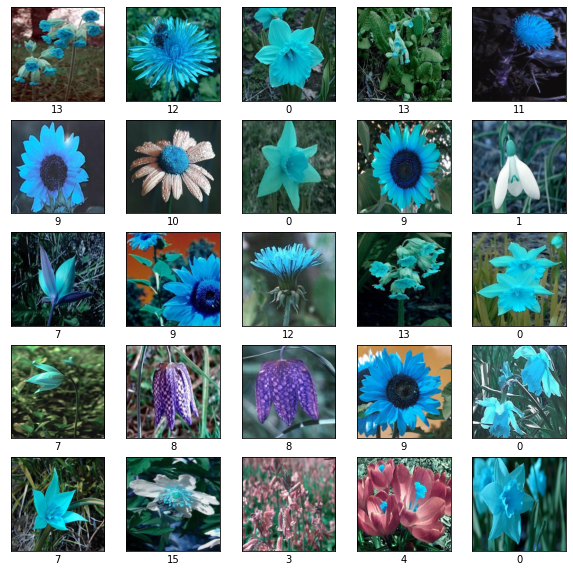

In [ ]:
# Plotting resized the images
show_image(imgs,normalized=False)

In [ ]:
# Verify the shape of image
imgs[0].shape

(224, 224, 3)

In [ ]:
imgs[100].shape

(224, 224, 3)

In [ ]:
# Verify the shape of images
imgs.shape

(1375, 224, 224, 3)

In [ ]:
# Verify the shape of labels
lbls.shape

(1375,)

**Observation:**
- All the images are same size. 

### Normalization

In [ ]:
# Check the data before normalization
imgs[0]

array([[[ 73.,  83.,  93.],
        [ 83.,  93., 103.],
        [ 47.,  57.,  66.],
        ...,
        [ 27.,  37.,  47.],
        [ 33.,  39.,  50.],
        [ 35.,  39.,  50.]],

       [[100., 112., 122.],
        [109., 119., 130.],
        [ 75.,  85.,  95.],
        ...,
        [ 35.,  45.,  55.],
        [ 35.,  41.,  52.],
        [ 37.,  41.,  52.]],

       [[131., 147., 156.],
        [120., 136., 145.],
        [ 95., 108., 118.],
        ...,
        [ 36.,  45.,  55.],
        [ 34.,  38.,  49.],
        [ 34.,  38.,  49.]],

       ...,

       [[ 41.,  41.,  53.],
        [ 39.,  39.,  51.],
        [ 36.,  36.,  48.],
        ...,
        [ 39.,  41.,  51.],
        [ 33.,  38.,  47.],
        [ 31.,  38.,  47.]],

       [[ 34.,  34.,  46.],
        [ 34.,  34.,  47.],
        [ 36.,  36.,  47.],
        ...,
        [ 35.,  39.,  50.],
        [ 29.,  33.,  44.],
        [ 31.,  35.,  46.]],

       [[ 29.,  29.,  41.],
        [ 29.,  29.,  41.],
        [ 31.,  

In [ ]:
# Apply the normalization
imgs = imgs/255

In [ ]:
# Verify the data after normalization
imgs[0]

array([[[0.28627452, 0.3254902 , 0.3647059 ],
        [0.3254902 , 0.3647059 , 0.40392157],
        [0.18431373, 0.22352941, 0.25882354],
        ...,
        [0.10588235, 0.14509805, 0.18431373],
        [0.12941177, 0.15294118, 0.19607843],
        [0.13725491, 0.15294118, 0.19607843]],

       [[0.39215687, 0.4392157 , 0.47843137],
        [0.42745098, 0.46666667, 0.50980395],
        [0.29411766, 0.33333334, 0.37254903],
        ...,
        [0.13725491, 0.1764706 , 0.21568628],
        [0.13725491, 0.16078432, 0.20392157],
        [0.14509805, 0.16078432, 0.20392157]],

       [[0.5137255 , 0.5764706 , 0.6117647 ],
        [0.47058824, 0.53333336, 0.5686275 ],
        [0.37254903, 0.42352942, 0.4627451 ],
        ...,
        [0.14117648, 0.1764706 , 0.21568628],
        [0.13333334, 0.14901961, 0.19215687],
        [0.13333334, 0.14901961, 0.19215687]],

       ...,

       [[0.16078432, 0.16078432, 0.20784314],
        [0.15294118, 0.15294118, 0.2       ],
        [0.14117648, 0

**Observation:**
- The image data values are normalized (i.e) converted between 0 to 1. 

### Shuffle the images along with labels

In [ ]:
# Verify the labels before shuffling
lbls

array([ 0,  0,  0, ..., 16, 16, 16])

In [ ]:
imgs, lbls = shuffle(imgs, lbls, random_state=95)

In [ ]:
# Verify the labels after shuffling
lbls

array([11,  5, 12, ...,  9,  1, 16])

**Observation:**
- In the beginning, read the images sequentially. These images shuffled to get good accuracy. 

## Data Visualization

### Display Images with labels

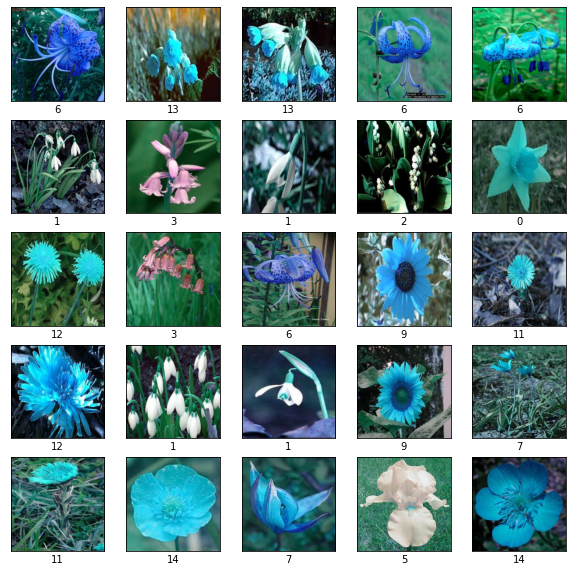

In [ ]:
# Plot the images with labels randomly
show_image(imgs, normalized=True)

In [ ]:
# Print the labels
lbls

array([11,  5, 12, ...,  9,  1, 16])

### Greyscale Image

In [ ]:
# Apply Greyscale on the images
greyscaleimg=[]

for i in range(0,len(imgs)):
      img = np.asarray(imgs[i], dtype='float32')
      gray = cv2.cvtColor(imgs[i], cv2.COLOR_BGR2GRAY)
      greyscaleimg.append(gray)

greyscaleimg = np.asarray(greyscaleimg)

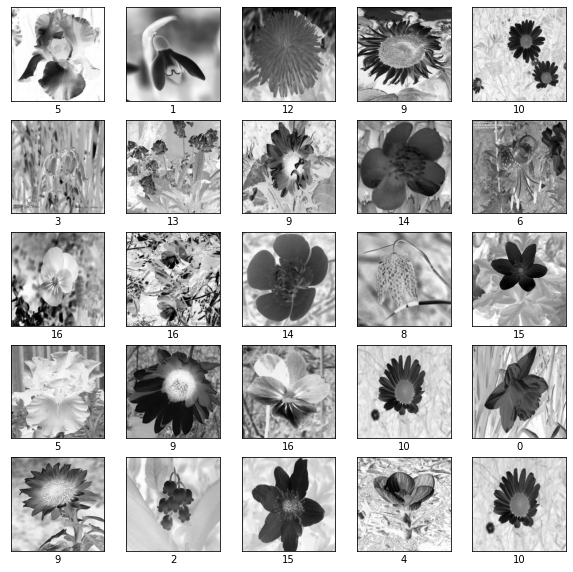

In [ ]:
# Plot the Greyscal images randomly
show_image(greyscaleimg, normalized=True)

### Edge Detection Filter

In [ ]:
# Use Sobel filter to find the edges on the images
edgeimg=[]
for i in range(0,len(greyscaleimg)):
      edges = cv2.Sobel(greyscaleimg[i],int(cv2.CV_64F),1,0,ksize=3)
      edgeimg.append(edges)

Text(0.5, 1.0, 'Edge Detected')

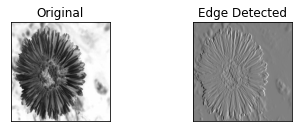

In [ ]:
# Plot the image with edges
reload(plt)
plt.subplot(2,2,1)
plt.imshow(greyscaleimg[0], cmap=plt.cm.binary)
plt.title("Original")
plt.xticks([])
plt.yticks([])
    
    
plt.subplot(2,2,2)
plt.imshow(edgeimg[0], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title("Edge Detected")

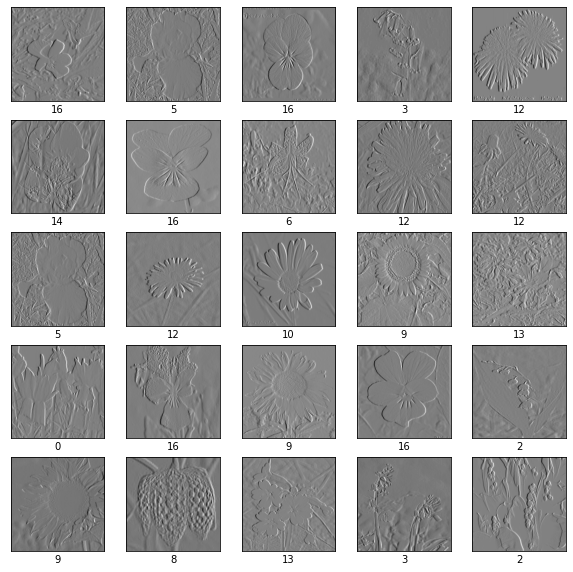

In [ ]:
# Plot the images with edges
show_image(edgeimg, normalized=True)

### Blurring or Smoothing

In [ ]:
# Apply Gaussian blurring on the images
blurimg=[]
for i in range(0,len(greyscaleimg)):
      blur = cv2.GaussianBlur(greyscaleimg[i], (9,9), 10.0)
      blurimg.append(blur)

blurimg = np.asarray(blurimg)

In [ ]:
# Apply Gaussian blurring on the images
blurimg=[]
for i in range(0,len(imgs)):
      blur = cv2.GaussianBlur(imgs[i], (9,9), 10.0)
      blurimg.append(blur)

blurimg = np.asarray(blurimg)

In [ ]:
blurimg.shape


(1375, 224, 224, 3)

Text(0.5, 1.0, 'Blurred')

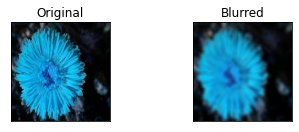

In [ ]:
 # Plot the blurred image
 reload(plt)
 plt.subplot(2,2,1)
 plt.imshow(imgs[0], cmap=plt.cm.binary)
 plt.title("Original")
 plt.xticks([])
 plt.yticks([])
    
    
 plt.subplot(2,2,2)
 plt.imshow(blurimg[0], cmap=plt.cm.binary)
 plt.xticks([])
 plt.yticks([])
 plt.title("Blurred")

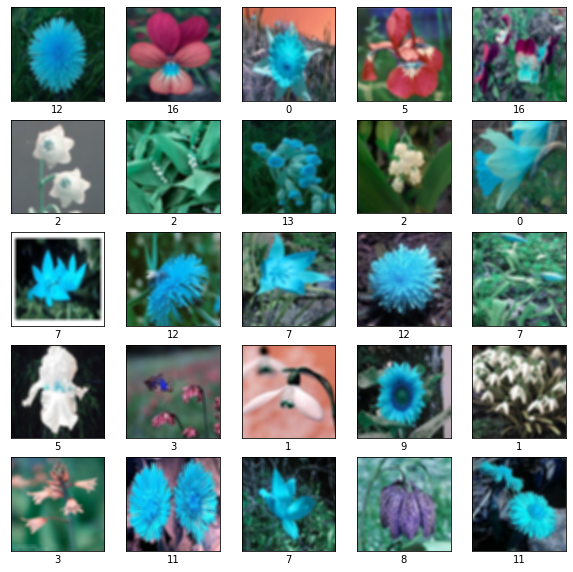

In [ ]:
# Plot the blurred images randomly
show_image(blurimg, normalized=True)

### Contour

In [ ]:
# Apply Contour on the images 
 contourimg = []
 for i in range(0,17):
        imgfiles = glob.glob(filepath+"/"+str(i)+"/*.jpg", recursive=True)
        for j in range(0, len(imgfiles)):
            img = cv2.imread(imgfiles[j])
            img = cv2.resize(img, (224,224))
            cimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            ret, thresh = cv2.threshold(cimg, 127, 255, 0)
            contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
            cng = cv2.drawContours(img, contours, -1, (0, 255, 0),  3)
            contourimg.append(cng)

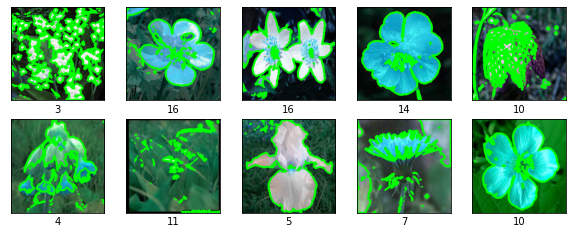

In [ ]:
# Plot the contour images
show_image(contourimg, normalized=False, numberofimgs=10)

### Emboss

In [ ]:
# Define the function to apply Emboss on images
def emboss_img(srcimg):
    filter = np.array([[1,0],[0,-1]])
    row = srcimg.shape[0]
    col = srcimg.shape[1]
    new_img=np.zeros([row,col],dtype=np.uint8)
    for i in range(row-1):
      for j in range(col-1):
        new_value = np.sum(srcimg[i:i + 2, j:j + 2] * filter) + 128  # point multiply
        if new_value > 255:
              new_value = 255
        elif new_value < 0:
              new_value = 0
        else:
              pass
        new_img[i, j]=new_value
    return new_img

Text(0.5, 1.0, 'Embossed')

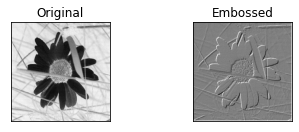

In [ ]:
# Take a sample image and convert into greyscale
grayemsimg = cv2.cvtColor(imgs[800]*255, cv2.COLOR_BGR2GRAY)

# Plot the embossed images using above defined function
reload(plt)
plt.subplot(2,2,1)
plt.imshow(grayemsimg, cmap=plt.cm.binary)
plt.title("Original")
plt.xticks([])
plt.yticks([])
    
    
plt.subplot(2,2,2)
plt.imshow(emboss_img(grayemsimg), cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title("Embossed")

## Model Building

In [ ]:
# Split the images as training and test sets
X_train, X_test, y_train, y_test = train_test_split(imgs,lbls,random_state=100, test_size=0.20)

In [ ]:
# Print the shape for training images
X_train.shape

(1100, 224, 224, 3)

**Observation:**
- There are 1100 images in training set with size of 224x224 and 3 channels

In [ ]:
# Print the shape of test images
X_test.shape

(275, 224, 224, 3)

**Observation:**
- There are 275 images in test set with size of 224x224 and 3 channels

In [ ]:
# Print the training set labels
y_train.shape

(1100,)

**Observation:**
- There are 1100 labels in training set.

In [ ]:
# Print the test set labels
y_test.shape

(275,)

**Observation:**
- There are 275 labels in test set.

In [ ]:
# Apply onehot encode in target labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
# Verify the target labels in training set after onehot encoding
y_train_cat.shape

(1100, 17)

**Observation:**
- There are 1100 labels with 17 attributes in training set

In [ ]:
# Verify the target labels in test set after onehot encoding
y_test_cat.shape

(275, 17)

**Observation:**
- There are 275 labels with 17 attributes in test set.

#### Base Model

In [ ]:
tf.keras.backend.clear_session()

#Initialize the model
model = Sequential()

# 1st block with Convolutional, Batch Normalization and Maxpool layers
model.add(Conv2D(filters=64,kernel_size=(3,3), activation="relu", padding="same", input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# 2nd block with Convolutional, Batch Normalization and Maxpool layers
model.add(Conv2D(filters=128,kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# 3rd block with Convolutional, Batch Normalization and Maxpool layers
model.add(Conv2D(filters=256,kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# 4th block with Convolutional, Batch Normalization and Maxpool layers
model.add(Conv2D(filters=512,kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# 5th block with Convolutional, Batch Normalization and Maxpool layers
model.add(Conv2D(filters=1024,kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# 6th block with Convolutional, Batch Normalization and Maxpool layers
model.add(Conv2D(filters=2048,kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Add Flatten layer
model.add(Flatten())

# 7th block with Dense and Dropout layers
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.25))

# 8th block with Dense and Dropout layers
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))

# 9th block with Dense and Dropout layers
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.25))

# 10th block with Dense and Dropout layers
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.25))

# Add output layer with Softmax activation function as it is multiclass classification
model.add(Dense(17, activation='softmax'))


In [ ]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 128)     512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 256)       2

In [ ]:
# Compile the model with Adam optimizer
optimizers = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizers)

In [ ]:
# Train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')
history = model.fit(X_train, y_train_cat,
          validation_data=(X_test, y_test_cat), 
          epochs=300,
          batch_size = 32,
          verbose=1,
          callbacks= [callback]
         )

Epoch 1/300
35/35 [==============================] - 24s 168ms/step - loss: 3.2184 - accuracy: 0.0827 - val_loss: 2.9672 - val_accuracy: 0.0436
Epoch 2/300
35/35 [==============================] - 4s 112ms/step - loss: 2.8609 - accuracy: 0.1182 - val_loss: 2.9736 - val_accuracy: 0.0582
Epoch 3/300
35/35 [==============================] - 4s 111ms/step - loss: 2.7238 - accuracy: 0.1591 - val_loss: 2.9500 - val_accuracy: 0.0582
Epoch 4/300
35/35 [==============================] - 4s 112ms/step - loss: 2.6529 - accuracy: 0.1973 - val_loss: 3.0504 - val_accuracy: 0.0509
Epoch 5/300
35/35 [==============================] - 4s 112ms/step - loss: 2.5052 - accuracy: 0.2291 - val_loss: 3.0460 - val_accuracy: 0.0509
Epoch 6/300
35/35 [==============================] - 4s 112ms/step - loss: 2.5249 - accuracy: 0.2245 - val_loss: 2.9713 - val_accuracy: 0.0509
Epoch 7/300
35/35 [==============================] - 4s 112ms/step - loss: 2.3483 - accuracy: 0.2682 - val_loss: 3.3604 - val_accuracy: 0.050

In [ ]:
# Evaluate test set
basemodel_eval_score = model.evaluate(X_test, y_test_cat)

9/9 [==============================] - 0s 31ms/step - loss: 0.8158 - accuracy: 0.7818


In [ ]:
# Predict the label for test set
y_pred= np.argmax(model.predict(X_test), axis=1)

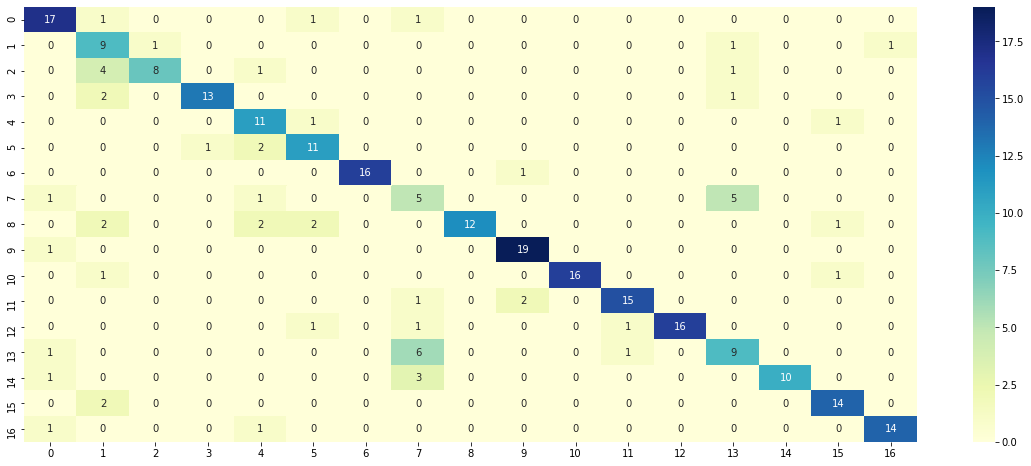

In [ ]:
# Print confusion matrix
plt.figure(figsize=(20,8))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='',cmap='YlGnBu')

**Observation:**
- There is no misclassification for classes 6, 8, 10, 12 and 14. All the images classified correctly. 
- For class 9, 19 images are classified correctly and classification incorrect for 3 images. 
- Misclassification count is very less for class 16. 14 images are classified correctly and classification incorrect for 1 image. 
- Misclassification count is high for classes 1, 7 and 13.  


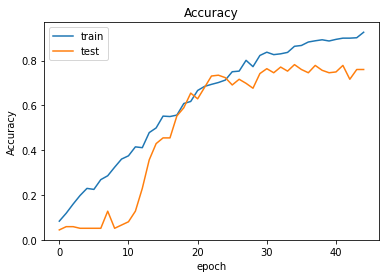

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observation:**
- Above graph Accuracy vs Epoch shows that finaly accuracy of training set (0.9264) is higher than test set(0.7600) accuracy in 45th epoch. At 20 epoch, accuracy of training set is very close to test set accuracy.

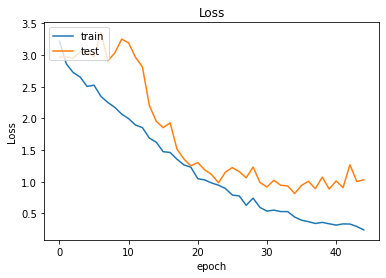

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observation:**
- Above graph Loss vs Epoch shows that training set loss (0.2404) is less than test set(1.0322) loss in final epoch. Accuracy and Loss graphs are shows that it is overfit model. 

## Transfer Learning

#### VGG16

In [ ]:
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Free all the the convolutional layers except dense and output layers
for layer in vgg_conv.layers:
    layer.trainable = False
 
for (i,layer) in enumerate(vgg_conv.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

58892288/58889256 [==============================] - 0s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
tf.keras.backend.clear_session()

# Initialize the model
vgg_model = Sequential()

# Load the VGG16 model weighhts to the model
vgg_model.add(vgg_conv)

# Add one more Convolutional layer
vgg_model.add(Conv2D(filters=1024,kernel_size=(3,3),  activation="relu"))
vgg_model.add(BatchNormalization())
vgg_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Add Batch Normailization and Flatten layers
vgg_model.add(BatchNormalization())
vgg_model.add(Flatten())

# Add Dense, Dropout and Batch Normilization layers
vgg_model.add(Dense(100, activation='relu'))
vgg_model.add(Dropout(0.4))

vgg_model.add(BatchNormalization())

vgg_model.add(Dense(80, activation='relu'))
vgg_model.add(Dropout(0.4))

vgg_model.add(BatchNormalization())

vgg_model.add(Dense(50, activation='relu'))
vgg_model.add(Dropout(0.4))

vgg_model.add(BatchNormalization())

# Add output layers with Softmax activation function
vgg_model.add(Dense(17, activation='softmax'))
vgg_model.summary() 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 1024)        4719616   
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 5, 1024)        4096      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 1024)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 2, 1024)        4096      
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               4

In [ ]:
# Compile the model with Adam optimizer
optimizers = tf.keras.optimizers.Adam(learning_rate=0.0001)
vgg_model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizers)

In [ ]:
# Train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')
history_vgg = vgg_model.fit(X_train, y_train_cat,
          validation_data=(X_test, y_test_cat), 
          epochs=200,
          batch_size = 32,
          verbose=1,
          callbacks= [callback]
         )

Epoch 1/200
35/35 [==============================] - 9s 166ms/step - loss: 3.2672 - accuracy: 0.0918 - val_loss: 2.7365 - val_accuracy: 0.1818
Epoch 2/200
35/35 [==============================] - 3s 85ms/step - loss: 2.8550 - accuracy: 0.1291 - val_loss: 2.5995 - val_accuracy: 0.3127
Epoch 3/200
35/35 [==============================] - 3s 84ms/step - loss: 2.6980 - accuracy: 0.1691 - val_loss: 2.4786 - val_accuracy: 0.4291
Epoch 4/200
35/35 [==============================] - 3s 85ms/step - loss: 2.5734 - accuracy: 0.2036 - val_loss: 2.3889 - val_accuracy: 0.4473
Epoch 5/200
35/35 [==============================] - 3s 85ms/step - loss: 2.4743 - accuracy: 0.2309 - val_loss: 2.2773 - val_accuracy: 0.5055
Epoch 6/200
35/35 [==============================] - 3s 84ms/step - loss: 2.3916 - accuracy: 0.2518 - val_loss: 2.1570 - val_accuracy: 0.5491
Epoch 7/200
35/35 [==============================] - 3s 84ms/step - loss: 2.3131 - accuracy: 0.2764 - val_loss: 2.0213 - val_accuracy: 0.6182
Epoch

In [ ]:
# Evaluate test set
vgg16_eval_score = vgg_model.evaluate(X_test, y_test_cat, batch_size=32)

9/9 [==============================] - 1s 64ms/step - loss: 0.6024 - accuracy: 0.8727


In [ ]:
# Predict the label for test set
y_pred_vgg= np.argmax(vgg_model.predict(X_test), axis=1)

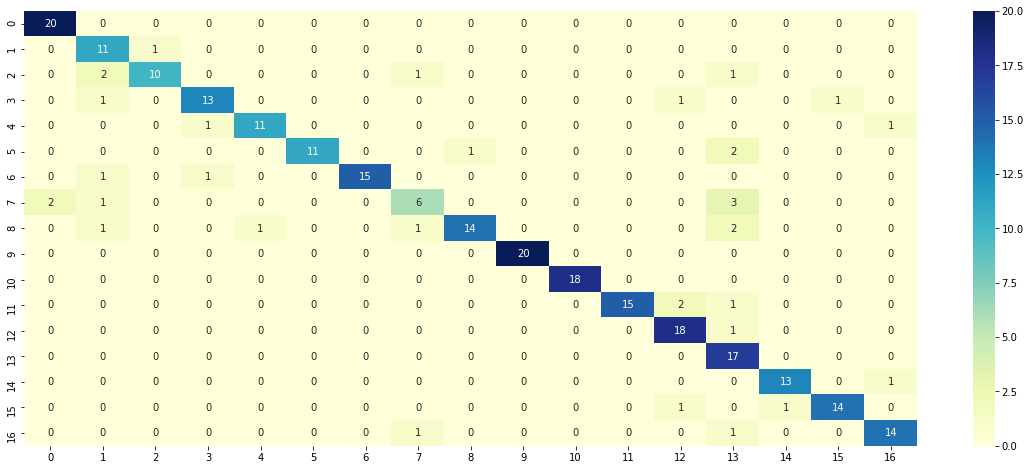

In [ ]:
# Print confusion matrix
plt.figure(figsize=(20,8))
sns.heatmap(confusion_matrix(y_test, y_pred_vgg),annot=True,fmt='',cmap='YlGnBu')

**Observation:**
- There is no misclassification for classes 5, 6, 9, 10 and 11. All the images classified correctly.
- For class 0, 20 images are classified correctly and classification incorrect for 2 images.
- Misclassification count is very less for classes 2, 4, 8, 14 and 15. 
- Misclassification count is high for class 13.

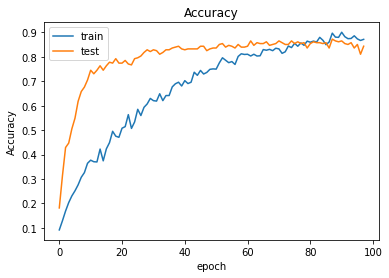

In [ ]:
plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observation:**

- Above graph Accuracy vs Epoch shows that final accuracy of training set (0.8718) is slight higher than test set(0.8436) accuracy in 98th epoch. 

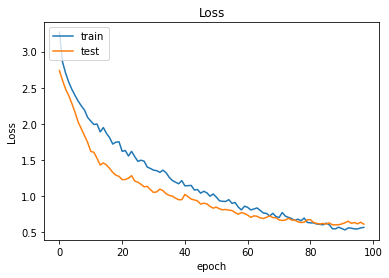

In [ ]:
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observation:**

- Above graph Loss vs Epoch shows that training set loss (0.5678) is less than test set(0.6124) loss in final epoch. There is a slight difference in loss between training and test sets. Accuracy and Loss graphs are shows that it is very good model. 

#### VGG19

In [ ]:
#Load the VGG19 model
# Load VGG19 models wewights 
vgg19_conv = VGG19(weights='imagenet',  include_top=False, input_shape=(224, 224, 3))

# Freeze the all the convolutional layers except dence layers 
for layer in vgg19_conv.layers:
    layer.trainable = False
 

for (i,layer) in enumerate(vgg19_conv.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

80142336/80134624 [==============================] - 1s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 Conv2D False
11 MaxPooling2D False
12 Conv2D False
13 Conv2D False
14 Conv2D False
15 Conv2D False
16 MaxPooling2D False
17 Conv2D False
18 Conv2D False
19 Conv2D False
20 Conv2D False
21 MaxPooling2D False


In [ ]:
tf.keras.backend.clear_session()

# Inialize the model
vgg19_model = Sequential()

# Add the VGG19 weights to model
vgg19_model.add(vgg19_conv)

# Add Flatten layer
vgg19_model.add(Flatten())

# Add dense and dropout layers
vgg19_model.add(Dense(100, activation='relu'))
vgg19_model.add(Dropout(0.75))

# Add output layer
vgg19_model.add(Dense(17, activation='softmax'))
vgg19_model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               2508900   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 17)                1717      
Total params: 22,535,001
Trainable params: 2,510,617
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
# Compile the model with Adam optimizer
optimizers = tf.keras.optimizers.Adam(learning_rate=0.0001)
vgg19_model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizers)

In [ ]:
# Train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')
history_vgg19 = vgg19_model.fit(X_train, y_train_cat,
          validation_data=(X_test, y_test_cat), 
          epochs=100,
          batch_size = 32,
          verbose=1,
          callbacks= [callback]
         )

Epoch 1/100
35/35 [==============================] - 4s 101ms/step - loss: 2.9668 - accuracy: 0.0664 - val_loss: 2.6942 - val_accuracy: 0.2073
Epoch 2/100
35/35 [==============================] - 3s 94ms/step - loss: 2.7026 - accuracy: 0.1191 - val_loss: 2.5120 - val_accuracy: 0.3236
Epoch 3/100
35/35 [==============================] - 3s 94ms/step - loss: 2.5701 - accuracy: 0.1464 - val_loss: 2.4160 - val_accuracy: 0.4255
Epoch 4/100
35/35 [==============================] - 3s 94ms/step - loss: 2.4879 - accuracy: 0.1555 - val_loss: 2.2781 - val_accuracy: 0.5055
Epoch 5/100
35/35 [==============================] - 3s 94ms/step - loss: 2.3733 - accuracy: 0.2291 - val_loss: 2.0762 - val_accuracy: 0.5418
Epoch 6/100
35/35 [==============================] - 3s 93ms/step - loss: 2.3205 - accuracy: 0.2445 - val_loss: 2.0291 - val_accuracy: 0.6182
Epoch 7/100
35/35 [==============================] - 3s 94ms/step - loss: 2.2327 - accuracy: 0.2573 - val_loss: 1.9623 - val_accuracy: 0.6509
Epoch

In [ ]:
# Evaluate test set
vgg19_eval_score = vgg19_model.evaluate(X_test, y_test_cat)

9/9 [==============================] - 1s 72ms/step - loss: 0.6641 - accuracy: 0.8182


In [ ]:
# Predict the label for test set
y_pred_vgg19= np.argmax(vgg19_model.predict(X_test), axis=1)

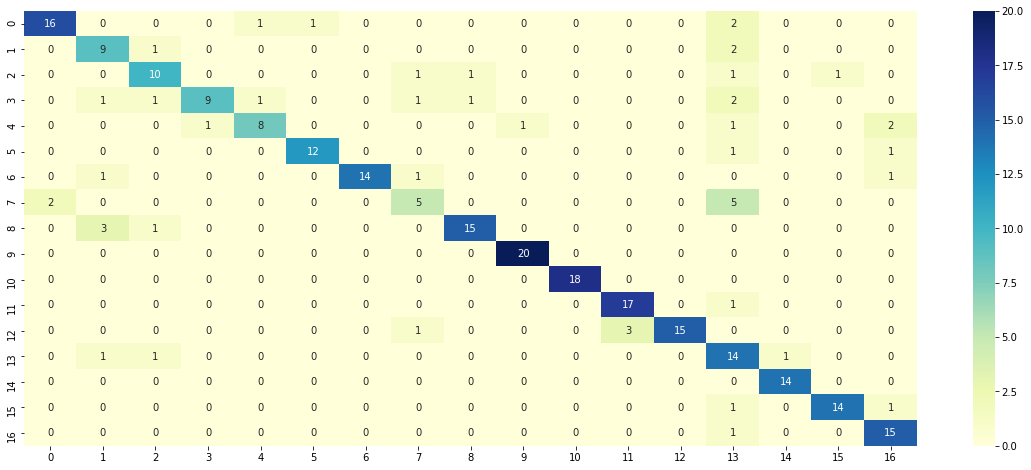

In [ ]:
# Print confusion matrix
plt.figure(figsize=(20,8))
sns.heatmap(confusion_matrix(y_test, y_pred_vgg19),annot=True,fmt='',cmap='YlGnBu')

**Observation:**

- There is no misclassification for classes 6, 10 and 12. All the images classified correctly.
- For class 9, 20 images are classified correctly and classification incorrect for 1 image.
- Misclassification count is very less for classes 0, 2, 3, 8, 9, 14 and 15.
- Misclassification count is high for classe 13.

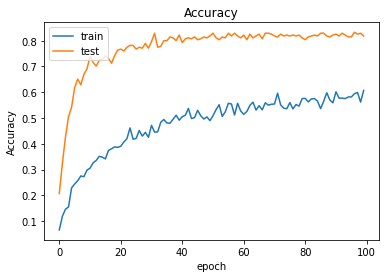

In [ ]:
plt.plot(history_vgg19.history['accuracy'])
plt.plot(history_vgg19.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observation:**

- Above graph Accuracy vs Epoch shows that final accuracy of training set (0.6073) is less than test set(0.8182) accuracy in 100th epoch. This model performs well in test set. 

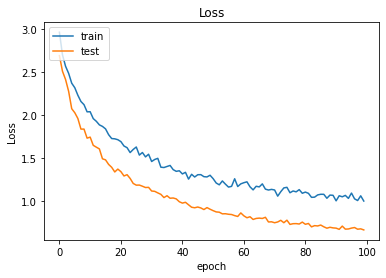

In [ ]:
plt.plot(history_vgg19.history['loss'])
plt.plot(history_vgg19.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observation:**

- Above graph Loss vs Epoch shows that training set loss (1.0004) is higher than test set(0.6641) loss in final epoch. Accuracy and Loss graphs are shows that it performs well in test set. 

#### ResNet50

In [ ]:
#Load the ResNet model
# Load the ResNet50 model weights
res50_conv = ResNet50(weights='imagenet',  include_top=False, input_shape=(224, 224, 3))

# Freeze the all convolutional layers 
for layer in res50_conv.layers:
    layer.trainable = False
 

for (i,layer) in enumerate(res50_conv.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

0 InputLayer False
1 ZeroPadding2D False
2 Conv2D False
3 BatchNormalization False
4 Activation False
5 ZeroPadding2D False
6 MaxPooling2D False
7 Conv2D False
8 BatchNormalization False
9 Activation False
10 Conv2D False
11 BatchNormalization False
12 Activation False
13 Conv2D False
14 Conv2D False
15 BatchNormalization False
16 BatchNormalization False
17 Add False
18 Activation False
19 Conv2D False
20 BatchNormalization False
21 Activation False
22 Conv2D False
23 BatchNormalization False
24 Activation False
25 Conv2D False
26 BatchNormalization False
27 Add False
28 Activation False
29 Conv2D False
30 BatchNormalization False
31 Activation False
32 Conv2D False
33 BatchNormalization False
34 Activation False
35 Conv2D False
36 BatchNormalization False
37 Add False
38 Activation False
39 Conv2D False
40 BatchNormalization False
41 Activation False
42 Conv2D False
43 BatchNormalization False
44 Activation False
45 Conv2D False
46 Conv2D False
47 BatchNormalization False
48 BatchNor

In [ ]:
tf.keras.backend.clear_session()
# Initialize the model
res50_model = Sequential()
# Load ResNet50 weights to mmodel
res50_model.add(res50_conv)

# Add one more Convolutional, Batch Normalization and Maxpool layers
res50_model.add(Conv2D(filters=1024,kernel_size=(3,3), activation="relu"))
res50_model.add(BatchNormalization())
res50_model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Add Flatten layer
res50_model.add(Flatten())

# Add Dense layers
res50_model.add(Dense(500, activation='relu'))
#res50_model.add(Dropout(0.2))

res50_model.add(Dense(400, activation='relu'))
#res50_model.add(Dropout(0.2))

res50_model.add(Dense(300, activation='relu'))
#res50_model.add(Dropout(0.2))

res50_model.add(Dense(200, activation='relu'))
#res50_model.add(Dropout(0.2))

res50_model.add(Dense(100, activation='relu'))
#res50_model.add(Dropout(0.2))

res50_model.add(Dense(50, activation='relu'))
#res50_model.add(Dropout(0.2))

res50_model.add(Dense(17, activation='softmax'))
res50_model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 1024)        18875392  
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 5, 1024)        4096      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 1024)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               2048500   
_________________________________________________________________
dense_1 (Dense)              (None, 400)               2

In [ ]:
# Compile the model with Adam optimizer
optimizers = tf.keras.optimizers.Adam(learning_rate=0.0001)
res50_model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizers)

In [ ]:
# Train the model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode='min')
history_res50 = res50_model.fit(X_train, y_train_cat,
          validation_data=(X_test, y_test_cat), 
          epochs=200,
          batch_size = 5,
          verbose=1,
          callbacks= [callback]
         )

Epoch 1/200
220/220 [==============================] - 12s 36ms/step - loss: 2.8569 - accuracy: 0.0655 - val_loss: 2.8180 - val_accuracy: 0.0945
Epoch 2/200
220/220 [==============================] - 7s 31ms/step - loss: 2.7928 - accuracy: 0.0855 - val_loss: 2.7676 - val_accuracy: 0.0800
Epoch 3/200
220/220 [==============================] - 7s 31ms/step - loss: 2.7773 - accuracy: 0.0855 - val_loss: 2.8003 - val_accuracy: 0.0545
Epoch 4/200
220/220 [==============================] - 7s 31ms/step - loss: 2.7073 - accuracy: 0.1255 - val_loss: 2.6962 - val_accuracy: 0.1200
Epoch 5/200
220/220 [==============================] - 7s 31ms/step - loss: 2.6633 - accuracy: 0.1264 - val_loss: 2.5738 - val_accuracy: 0.1636
Epoch 6/200
220/220 [==============================] - 7s 31ms/step - loss: 2.5987 - accuracy: 0.1427 - val_loss: 2.5528 - val_accuracy: 0.1927
Epoch 7/200
220/220 [==============================] - 7s 31ms/step - loss: 2.5398 - accuracy: 0.1600 - val_loss: 2.4048 - val_accuracy

In [ ]:
# Evaluate test set
res50_eval_score = res50_model.evaluate(X_test, y_test_cat)

9/9 [==============================] - 2s 62ms/step - loss: 1.6679 - accuracy: 0.4655


In [ ]:
# Predict the label for test set
y_pred_res50= np.argmax(res50_model.predict(X_test), axis=1)

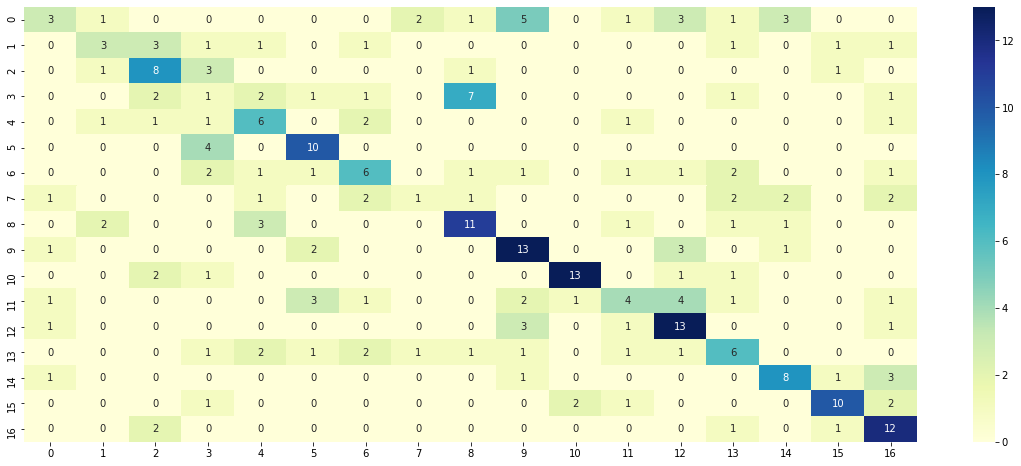

In [ ]:
# Print confusion matrix
plt.figure(figsize=(20,8))
sns.heatmap(confusion_matrix(y_test, y_pred_res50),annot=True,fmt='',cmap='YlGnBu')

**Observation:**

- For class 10, 13 images are classified correctly and classification incorrect for 3 images.
- Misclassification count is high for many classes. 

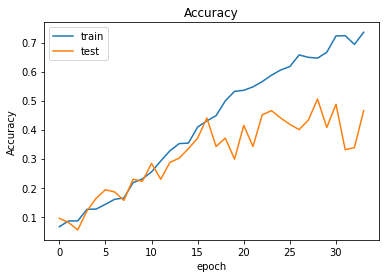

In [ ]:
plt.plot(history_res50.history['accuracy'])
plt.plot(history_res50.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observation:**

Above graph Accuracy vs Epoch shows that final accuracy of training set (0.7355) is higher than test set(0.4655) accuracy in 34th epoch. This is not good model since test accuracy is very less. 

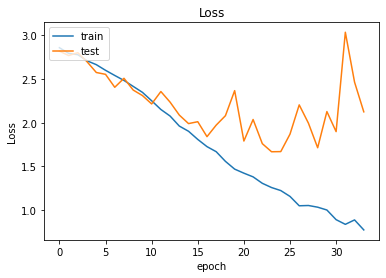

In [ ]:
plt.plot(history_res50.history['loss'])
plt.plot(history_res50.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Observation:**

- Above graph Loss vs Epoch shows that training set loss (0.7745) is less than test set(2.1242) loss in 34th epoch. It shows that this model is not right fit as loss is very high and accuracy is very less for test set.

## Model Comparison

In [ ]:
model_name=[]
eval_score = []
eval_loss = []

model_name.append("Base Model")
model_name.append("VGG16 Model")
model_name.append("VGG19 Model")
model_name.append("ResNet50 Model")

eval_score.append(basemodel_eval_score[1])
eval_score.append(vgg16_eval_score[1])
eval_score.append(vgg19_eval_score[1])
eval_score.append(res50_eval_score[1])

eval_loss.append(basemodel_eval_score[0])
eval_loss.append(vgg16_eval_score[0])
eval_loss.append(vgg19_eval_score[0])
eval_loss.append(res50_eval_score[0])


dfscore = pd.DataFrame(data=[model_name, eval_score, eval_loss], index=["Model","Evaluation Score","Evaluation Loss"])
dfscore.T


Model Evaluation Score Evaluation Loss
0      Base Model         0.781818        0.815838
1     VGG16 Model         0.872727        0.602445
2     VGG19 Model         0.818182        0.664144
3  ResNet50 Model         0.465455         1.66791

**Observation:**
- **VGG16 Model:** The evaluation score is high and evaluation loss is very less when compare to other models. Accuracy of training set (0.8718) is slight higher than test set(0.8436) and training set loss (0.5678) is less than test set(0.6124) loss in final epoch. There is a slight difference in loss between training and test sets. 
- **VGG19 Model:** This model has given second highest evaluation score and second lowest evalution loss. Accuracy of training set (0.6073) is less than test set(0.8182) accuracy and training set loss (1.0004) is higher than test set(0.6641) loss.
- **Base Model:** This model has given third highest evaluation score and third lowest evalution loss. Accuracy of training set (0.9264) is higher than test set(0.7600) accuracy and  training set loss (0.2404) is less than test set(1.0322) loss. 
- **ResNet50 Model:** This model has given poor performance. The evaluation score is very less and loss is very high when compared to other models. Accuracy of training set (0.7355) is higher than test set(0.4655) accuracy and training set loss (0.7745) is less than test set(2.1242) loss.

- **Take Away:** The model which built using Transfer learning with VGG16 weights has given very good accuracy and less loss. Also it is not overfit model. 

## Strategy to maintain and support the AIML image classifier post production 

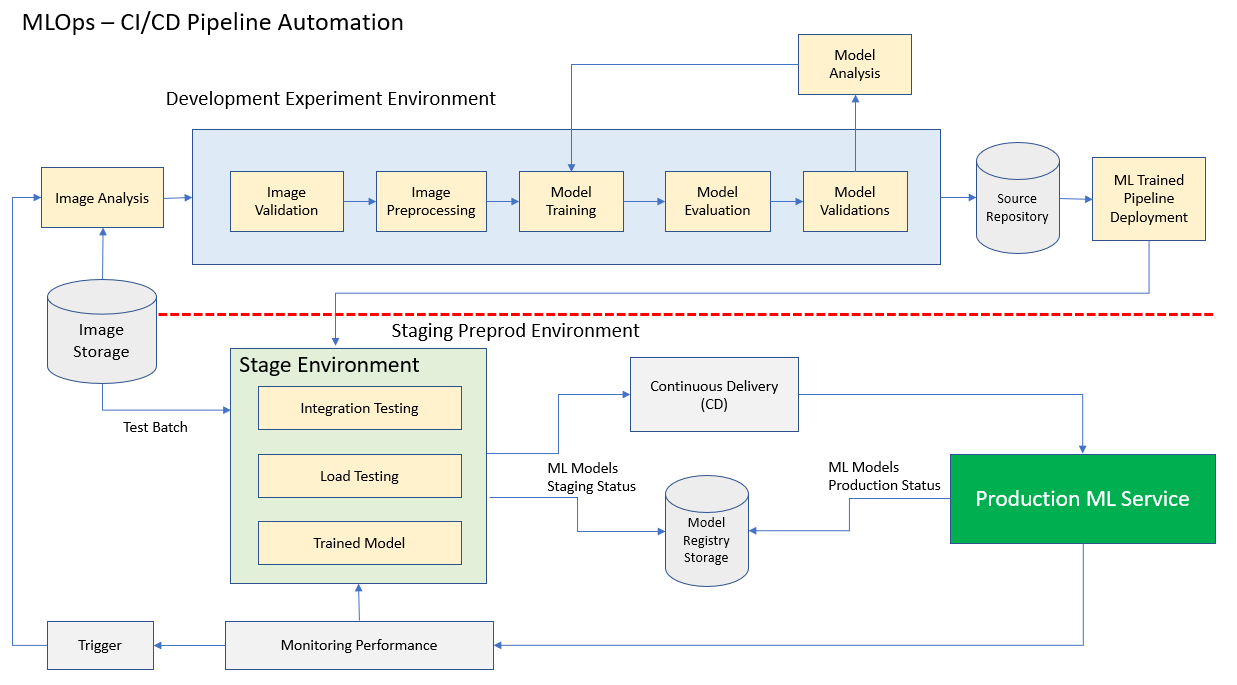

1. There will be two environments.
     - Development experiment environment
     - Staging preprod environment. 
2. In Development experiment environment, build automated ML pipeline to perform contininuous training of the model, this allows to achieve continuous delivery of model prediction service. To automate the process of using new images to retrain models in production, we need to introduce automated data and model validation steps to the pipeline, as well as pipeline triggers and metadata management. 
    - **Image Analysis:** Fetch the images from image storage and perform intialial analysis. In this stage, verify number of images, color channels and shape etc. 
    - **Image Validation:** This step is required before model training to decide whether we should retrain the model or stop the execution of the pipeline. This decision is automatically made if there are sufficient images available for training.
    - **Image preprocessing:** In this stage, perform precessing steps like reshape, normalization, shuffle images, etc. 
    - **Model Training:** Training will be performed in this stage. 
    - **Model Evaluation & Validation:** This step occurs after we successfully trained the model with given new images. We evaluate and validate the model before promoting to stage environment. 
    - **Model Analysis:** If Model Evaluation score is less than threshold limit, model will be retrained with help of hyper parameter tuning. 
    - **Source Repository:** Information about each execution of the ML pipeline is recorded in order to help with data and artifacts lineage, reproducibility, and comparisons. It also helps us debug errors and anomalies. 
    - **Pipeline Deployement:** Post completion of model validation step, the trained model will be deployed into stage environment through pipeline. 
3. In Staging environment, the test images will be pulled from Image storage and perform automated testing. If test result is successfull, the trained model will be stored into model respository and it will be deployed into Production through continuous delivery. 
4. **Performance Monitoring:** Collect statistics on the model performance based on live images. The output of this stage is a trigger to execute the pipeline or to execute a new experiment cycle.  
5. **Trigger:** The pipeline is automatically executed to train the model, deploy trained model into stage then production based on a schedule or in response to a trigger. The output of this stage is a trained model that is pushed to the model registry.

# End Project